# Data Scientist Professional Practical Exam Submission


**Data Validation:**

The first step of the model building process is cleaning and validating your dataset. 
My first action was to validate that each variable in the dataset matched its description from the problem-statement.
I obtained the following results:

 Dimensions: 947 rows, 8 columns

 
- recipe     :     int64  -  No missing values 
- calories   :     float64 - 52 missing values
- carbohydrate  :   float64 - 52 missing values
- sugar         :   float64 - 52 missing values
- protein       :   float64 - 52 missing values
- category       :   object-  10 categories- Lunch/Snacks', 'Beverages', 'Potato',
        'Vegetable', 'Meat', 'Chicken, 'Pork', 'Dessert', 'Breakfast', 'One
           Dish Meal'. No missing values
- servings      :    object- 4 unique values - No missing values
- high_traffic   :   object- 1 unique value  - 373 missing values

The only data type that did not match what was defined in the problem-statement was the 'servings' column which was supposed to be numerical. Therefore, my first step was to convert 'servings' to numeric form to match what was provided.

As can be seen, the dataset had several missing values. Among these missing values were those of the dependent variable, high_traffic. Given that the only value in the high_traffic column was 'High', it would not be prudent to remove the missing values entirely. Therefore, I assumed that missing values for high_traffic would take the value 'Low'. 

For missing values in the other columns- carbohydrate, calories, protein, sugars- I first grouped the dataframe by the 'category' variable. Then, I replaced the missing values of the nutritional variables with the means of these variables for the given category. This means that, for instance, a missing 'sugars' value from breakfast would be replaced with the mean 'sugars' value for the entire 'breakfast' category. My reasoning while doing this was that replacing the missing values with the categorical means would not create excessive bias. 

After imputing the missing values, I confirmed that there were no missing values remaining in the dataset, and that every column matched its defined type.

**Exploratory Analysis:**

For single variable visualizations, I decided to use a KDE plot on the calories variable considering its non-parametric nature. I also used a countplot to plot the frequencies of the different categories under the 'category' variable. The KDE plot of calories demonstrates its left-skewed nature. The countplot of different categories tells us 'Breakfast' is most commonly occurring within the dataset, while 'One dish meal' is least. However, given this is a single variable plot, this visual does not tell us anything about categories being high or low traffic.

For the graphic showing two or more variables, I used plotly to juxtapose interactive bar charts for high and low traffic, showing the mean values of the 4 nutritional metrics (calories, carbohydrate, protein, sugar) for each of the 10 categories under 'category'. These plots clearly show that popular recipes with high site traffic contain more protein on average than low traffic recipes, while also containing less sugars, carbohydrates, and calories. These observations hold true consistently across all categories of recipes, indicating that health preferences may be playing a part in recipe popularity. 

**Model Development:**

Given the predicted variable in this scenario is high_traffic, taking values 'High'  and 'Low', the problem at hand deals with binary classification. Therefore, for the baseline model, I decided to use Logistic regression. 
To develop this model, I one-hot encoded the different categories of the 'category' variable to make it numerical. In addition, I used the scikit-learn standardscaler for scaling the training and test sets as 'calories' is in a different unit to the other nutritional variables which are in grams per serving, as well as 'servings' itself.

For the comparison model, I opted for a Random Forest model using the sklearn.ensemble RandomForestClassifier. This decision was based on random forest models not requiring variable scaling, the ability to generate variable importance tables, and its non-linear nature.  To optimize model performance, I customized the min_samples_split, bootstrap,min_samples_leaf, and max_depth hyperparameters.
The linear nature of logistic regression compared to random forest's non-linear nature would provide for an interesting metric upon which to evaluate baseline and comparison model performances.

**Model Evaluation:**

The baseline logistic regression model performed fairly well, with an accuracy rate of a little over 76.3%. 
On the other hand, the random forest model did a little worse, with an accuracy rate of around 75.8%. For random forest, this was the highest accuracy rate being generated out of several combinations of hyperparameters. 

**Business Goals:**

The primary goals of this project for Tasty Bytes are to understand which recipes will lead to high traffic, and to correctly identify high-traffic recipes 80% of the time. 
To address these problems, I used the baseline and comparison models to identify factors that affect recipe popularity, and predict whether a recipe would receive 'High' or 'Low' traffic.


**Business Metrics:**

Both baseline and comparison models fell slightly short of the businesses target accuracy of 80%. However, the combination of a prediction success rate of over 75% for both models, as well as the conclusion derived from exploratory analysis are highly relevent towards business concerns. 
I created a feature importance dataframe based on the random forest model results to better understand the weight of different variables on model performance. The results for this confirmed what the exploratory analysis suggested: protein value was by far the most important determinant towards website traffic at almost 25%, with 'Vegetable' based recipes in second at 13.7%. These findings complement what was also observed in the dataset: site users are health-conscious and recipes being high in protein are the biggest determinant of high site traffic. 

**Summary:**

Based on the results obtained through both the exploratory data analysis as well as the model development, it is clear to see that site users prefer protein rich recipes which are also lower in carbohydrates, sugars and calories. Therefore, I would highly recommend that Tasty Bytes prioritize the publishing of protein-rich recipes that are low in the other numerical nutrion metrics, in order to optimize website traffic.


In [1]:
# Start coding here...
import pandas as pd

In [2]:
df1=pd.read_csv("recipe_site_traffic_2212.csv")

In [3]:
df1.dtypes

recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic     object
dtype: object

In [4]:
df1.servings.nunique()

6

In [6]:
df1['servings'] = pd.to_numeric(df1['servings'], errors='coerce')

In [8]:
df1.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          3
high_traffic    373
dtype: int64

In [9]:
df1.category.unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [10]:
df1.fillna({'high_traffic':'Low'},inplace=True)

In [11]:
import numpy as np

In [12]:
lst1 = ['calories', 'carbohydrate', 'sugar', 'protein']

for col in lst1:
    df1.loc[:,col]=df1.groupby('category')[col].transform(lambda x: x.fillna(x.mean()))

In [13]:
import matplotlib.pyplot as plt

In [14]:
import seaborn as sns

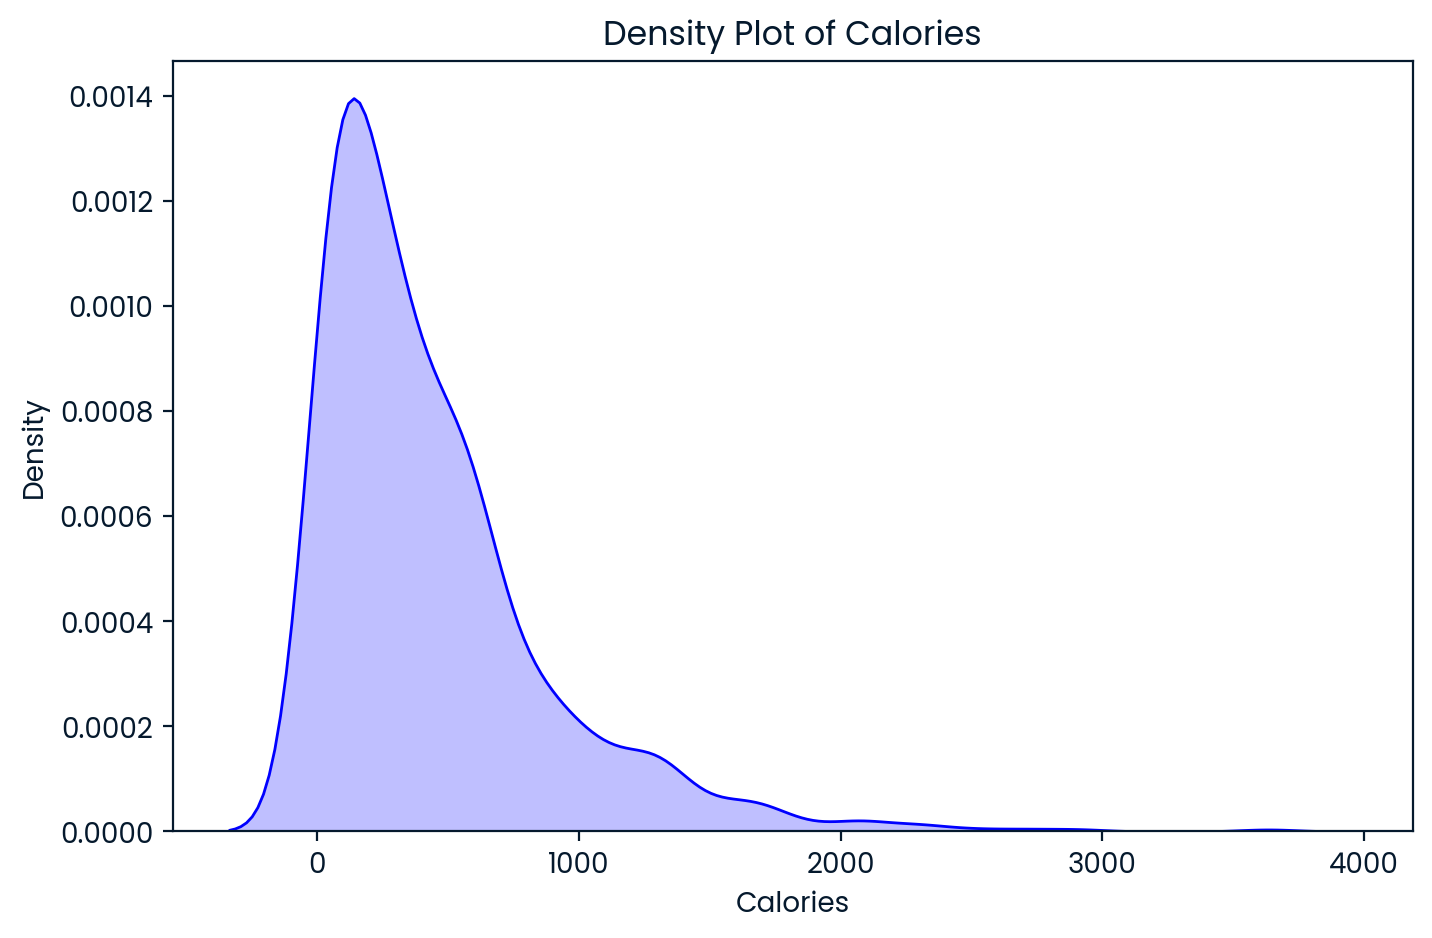

In [15]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df1.calories, shade=True, color='blue')
plt.title('Density Plot of Calories')
plt.xlabel('Calories')
plt.ylabel('Density')
plt.show()

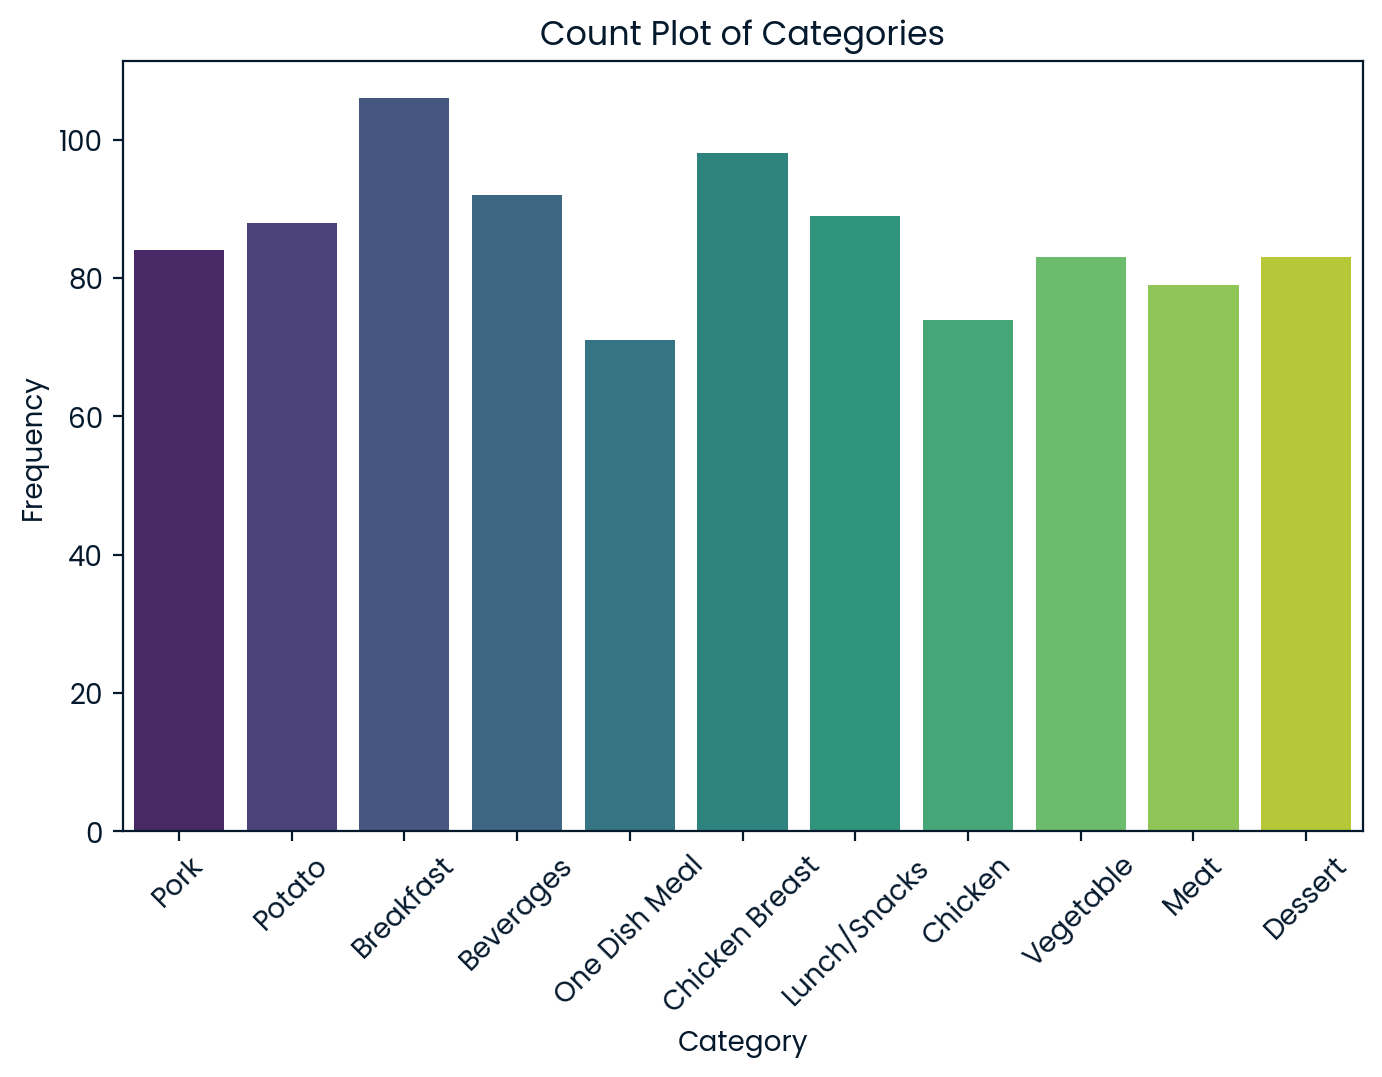

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df1['category'], palette='viridis')
plt.title('Count Plot of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [17]:
import plotly.express as px
summary = df1.groupby(['category', 'high_traffic'])[['calories', 'carbohydrate', 'protein', 'sugar']].mean()

# Plot for 'Low' traffic
low_traffic_summary = summary.xs('Low',level='high_traffic')
low_traffic_summary_reset = low_traffic_summary.reset_index()
low_traffic_fig = px.bar(
    low_traffic_summary_reset,
    x='category',
    y=['calories', 'carbohydrate', 'protein', 'sugar'],
    title='Nutritional Means by Category for Low Traffic',
    color_discrete_sequence=['gold', 'teal', 'indigo', 'brown'],  # Custom bar colors
    labels={'value': 'Mean Value', 'category': 'Category'},
    barmode='group',
    height=600
)
low_traffic_fig.update_layout(
    xaxis_tickangle=45,
    legend_title_text='Variable'
)
low_traffic_fig.show()

# Plot for 'High' traffic
high_traffic_summary = summary.xs('High',level='high_traffic')
high_traffic_summary_reset = high_traffic_summary.reset_index()
high_traffic_fig = px.bar(
    high_traffic_summary_reset,
    x='category',
    y=['calories', 'carbohydrate', 'protein', 'sugar'],
    color_discrete_sequence=['gold', 'teal', 'indigo', 'brown'],  # Custom bar colors
    title='Nutritional Means by Category for High Traffic',
    labels={'value': 'Mean Value', 'category': 'Category'},
    barmode='group',
    height=600
)
high_traffic_fig.update_layout(
    xaxis_tickangle=45,
    legend_title_text='Variable'
)
high_traffic_fig.show()


In [18]:
#baseline model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


# Generate dummy variables for 'category'
category_dummies = pd.get_dummies(df1['category'], drop_first=True)

# Concatenate dummy columns with the original DataFrame
df1 = pd.concat([df1, category_dummies], axis=1)
df1 = df1.loc[:,~df1.T.duplicated()]


# Split data
X = df1[['calories', 'carbohydrate', 'sugar', 'protein', 'servings']+ list(category_dummies.columns)].fillna(0)
y = df1['high_traffic'].map({'High': 1, 'Low': 0})  # Binary encoding

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7631578947368421
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.64      0.69        77
           1       0.77      0.85      0.81       113

    accuracy                           0.76       190
   macro avg       0.76      0.74      0.75       190
weighted avg       0.76      0.76      0.76       190



In [19]:
# Comparison Model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42,max_depth=20,min_samples_split=40,
                                  min_samples_leaf=4,bootstrap=False)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy (Random Forest): 0.7578947368421053
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.65      0.68        77
           1       0.78      0.83      0.80       113

    accuracy                           0.76       190
   macro avg       0.75      0.74      0.74       190
weighted avg       0.76      0.76      0.76       190



In [20]:
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [21]:
feature_importance_df

,Feature,Importance
3,protein,0.249424
14,Vegetable,0.137687
5,Breakfast,0.096993
13,Potato,0.096860
12,Pork,0.078610
0,calories,0.072185
1,carbohydrate,0.070688
2,sugar,0.059638
6,Chicken,0.048921
7,Chicken Breast,0.022223


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation